# **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sample-Superstore.csv to Sample-Superstore.csv


In [3]:
df=pd.read_csv('Sample-Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **cleaning**

In [4]:
df.shape

(9994, 21)

In [5]:
df = df.drop(columns=["Customer Name", "Row ID","Postal Code", "Sub-Category"])

In [6]:
df.shape

(9994, 17)

In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Ship Date     9994 non-null   object 
 3   Ship Mode     9994 non-null   object 
 4   Customer ID   9994 non-null   object 
 5   Segment       9994 non-null   object 
 6   Country       9994 non-null   object 
 7   City          9994 non-null   object 
 8   State         9994 non-null   object 
 9   Region        9994 non-null   object 
 10  Product ID    9994 non-null   object 
 11  Category      9994 non-null   object 
 12  Product Name  9994 non-null   object 
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   int64  
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(13)
memory usage: 1.3+ MB


In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [10]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Segment,0
Country,0
City,0
State,0
Region,0


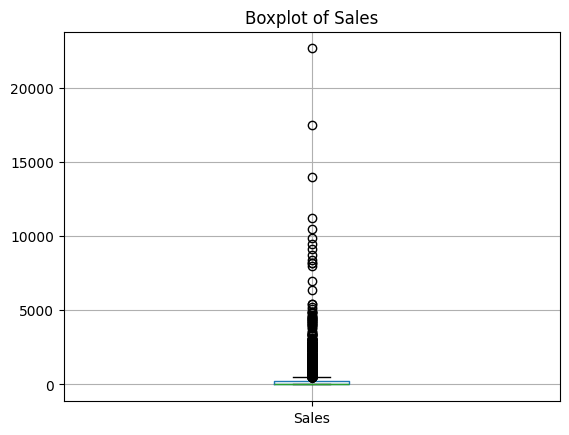

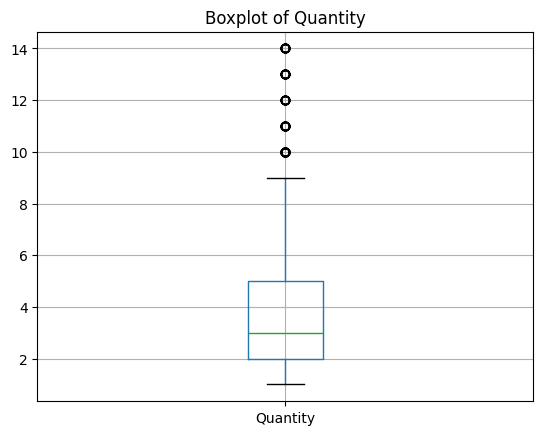

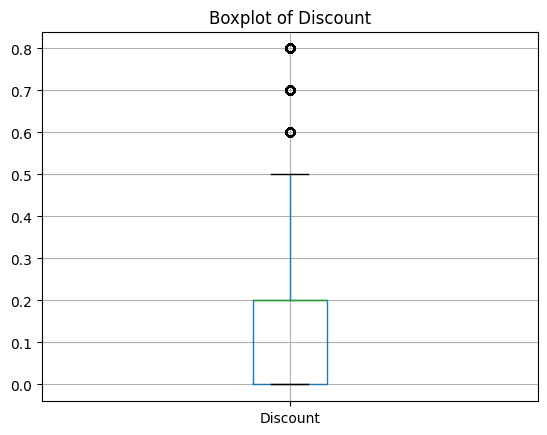

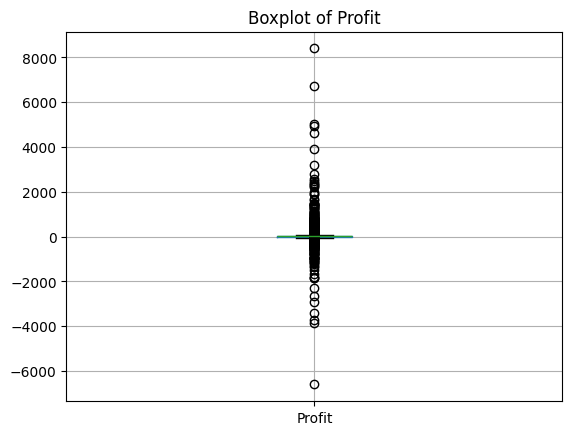

In [11]:
for col in df.select_dtypes(include='number').columns:
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

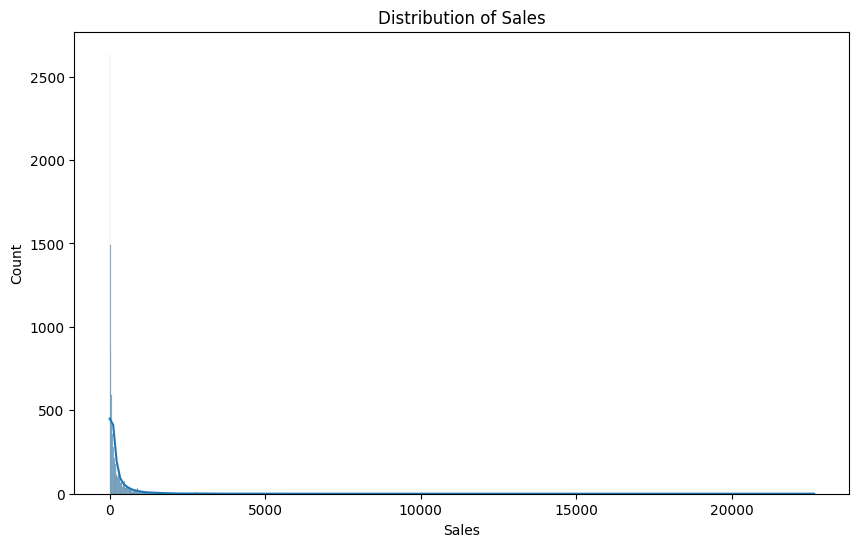

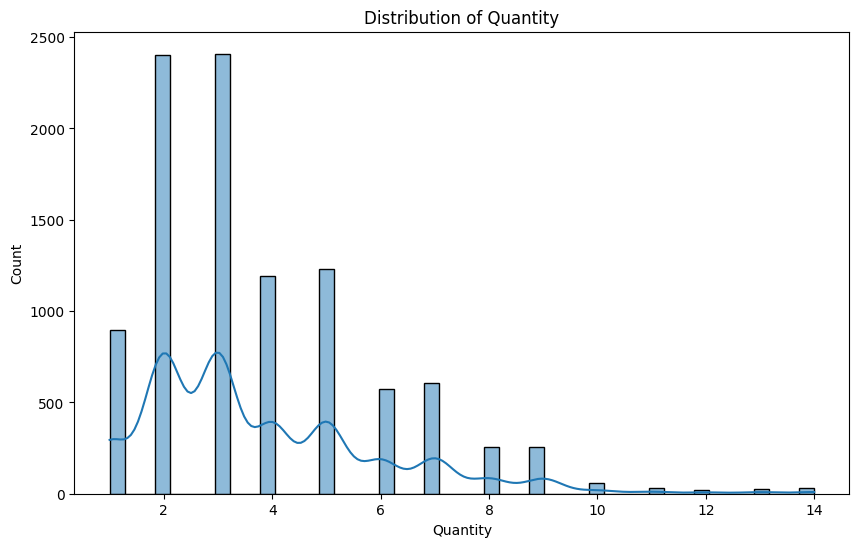

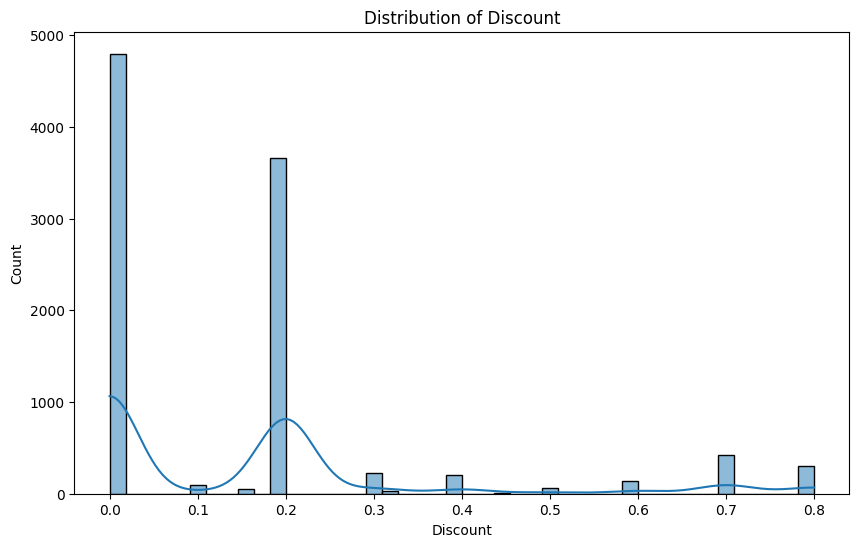

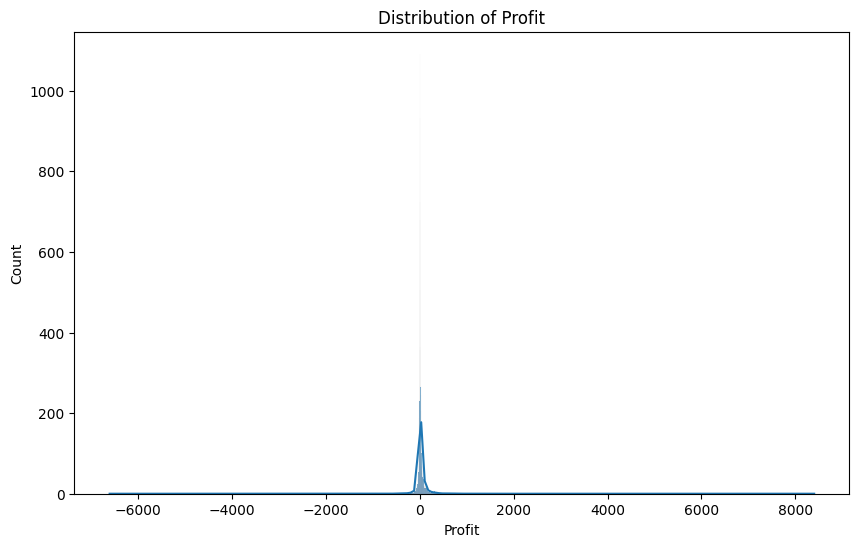

In [12]:
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [13]:
#data = {'values': [10, 12, 15, 14, 13, 200, 250, 16, 14, 12]}
#values = np.array(data['values'])

#Q1 = np.percentile(values, 25)
#Q3 = np.percentile(values, 75)
#IQR = Q3 - Q1

#outliers = values[(values < Q1 - 1.5*IQR) | (values > Q3 + 1.5*IQR)]

#percentage = len(outliers) / len(values) * 100
#print(f"Outliers Percentage: {percentage:.2f}%")

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_log = df.copy()
df_log[numeric_cols] = df_log[numeric_cols].apply(lambda x: np.log1p(x))

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **EDA**

# **sales and profit performance**

In [15]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
##"What is the total sales and total profit?
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


In [17]:
##What is the average discount rate?
average_discount = df['Discount'].mean() * 100
print("average discount:", average_discount, "%")

average discount: 15.620272163297976 %


In [18]:
##Are there any products or orders that are recording a loss?
loss_orders = df[df['Profit'] < 0]
num_loss_orders = len(loss_orders)

loss_by_category = loss_orders['Category'].value_counts()

print(" number of Requests are recording a loss : ", num_loss_orders)
print("Distribution of losses according to categories :")
print(loss_by_category)

 number of Requests are recording a loss :  1871
Distribution of losses according to categories :
Category
Office Supplies    886
Furniture          714
Technology         271
Name: count, dtype: int64


<Axes: title={'center': 'Number of Loss Orders by Category'}, xlabel='Category'>

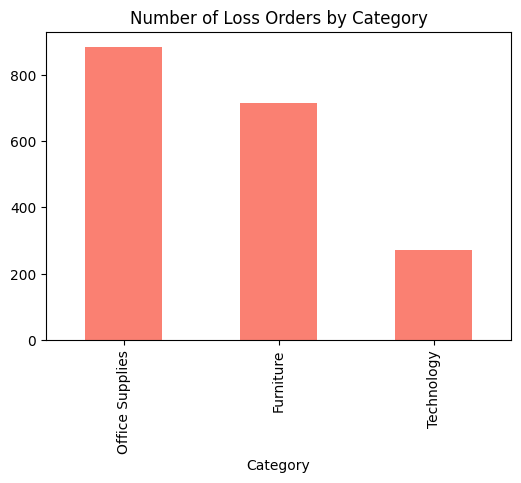

In [19]:
loss_orders = df[df['Profit'] < 0]
loss_by_category = loss_orders['Category'].value_counts()
loss_by_category.plot(kind='bar', figsize=(6,4), color='salmon', title="Number of Loss Orders by Category")


# **Analysis by Customer and Segment**

In [20]:
## Which segment generates the highest sales and profits?
pd.options.display.float_format = '{:,.2f}'.format

segment_sales_profit = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

segment_sales_profit['Profit Margin (%)'] = (segment_sales_profit['Profit'] / segment_sales_profit['Sales'] * 100).round(2)

segment_sales_profit = segment_sales_profit.sort_values(by='Sales', ascending=False)

print("Total sales and profits by Segment :")
print(segment_sales_profit)

Total sales and profits by Segment :
       Segment        Sales     Profit  Profit Margin (%)
0     Consumer 1,161,401.34 134,119.21              11.55
1    Corporate   706,146.37  91,979.13              13.03
2  Home Office   429,653.15  60,298.68              14.03


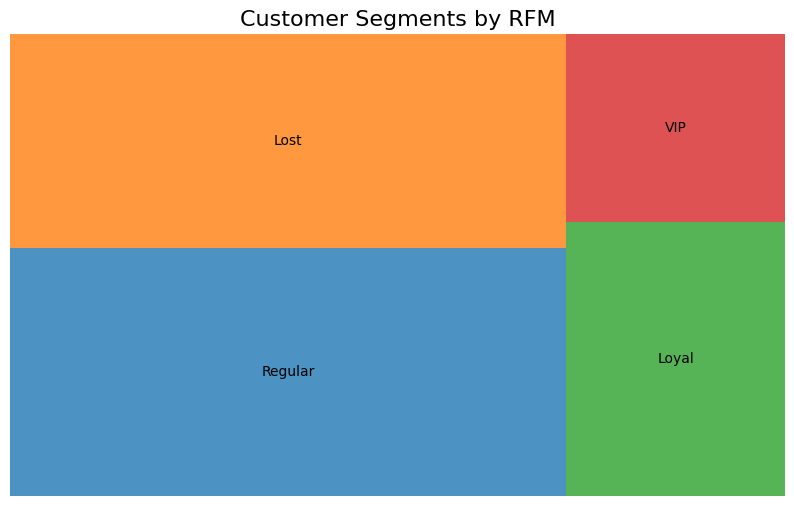

In [21]:
import plotly.express as px
!pip install squarify
import squarify

snapshot_date = df["Order Date"].max() + pd.Timedelta(days=1)

rfm = df.groupby("Customer ID").agg({
    "Order Date": lambda x: (snapshot_date - x.max()).days,  # Recency
    "Order ID": "nunique",   # Frequency
    "Sales": "sum"           # Monetary
}).reset_index()

rfm.rename(columns={"Order Date": "Recency",
                    "Order ID": "Frequency",
                    "Sales": "Monetary"}, inplace=True)

rfm["R_quartile"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_quartile"] = pd.qcut(rfm["Frequency"], 4, labels=[1,2,3,4])
rfm["M_quartile"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

rfm["RFM_Score"] = rfm["R_quartile"].astype(str) + rfm["F_quartile"].astype(str) + rfm["M_quartile"].astype(str)

def segment_me(df):
    if df["RFM_Score"] in ["444", "443", "434", "344"]:
        return "VIP"
    elif df["RFM_Score"][0] in ["3","4"] and df["RFM_Score"][1] in ["3","4"]:
        return "Loyal"
    elif df["RFM_Score"][0] in ["1","2"] and df["RFM_Score"][1] in ["1","2"]:
        return "Lost"
    else:
        return "Regular"

rfm["Segment"] = rfm.apply(segment_me, axis=1)

seg_counts = rfm["Segment"].value_counts()

plt.figure(figsize=(10,6))
squarify.plot(sizes=seg_counts.values,
              label=seg_counts.index,
              alpha=0.8,
              color=["#1f77b4","#ff7f0e","#2ca02c","#d62728"])
plt.title("Customer Segments by RFM", fontsize=16)
plt.axis("off")
plt.show()

fig = px.scatter(rfm, x="Frequency", y="Monetary",
                 size="Recency", color="Segment",
                 hover_data=["Customer ID","RFM_Score"],
                 title="RFM Segmentation - Customers")
fig.show()


# **Analysis by geography**

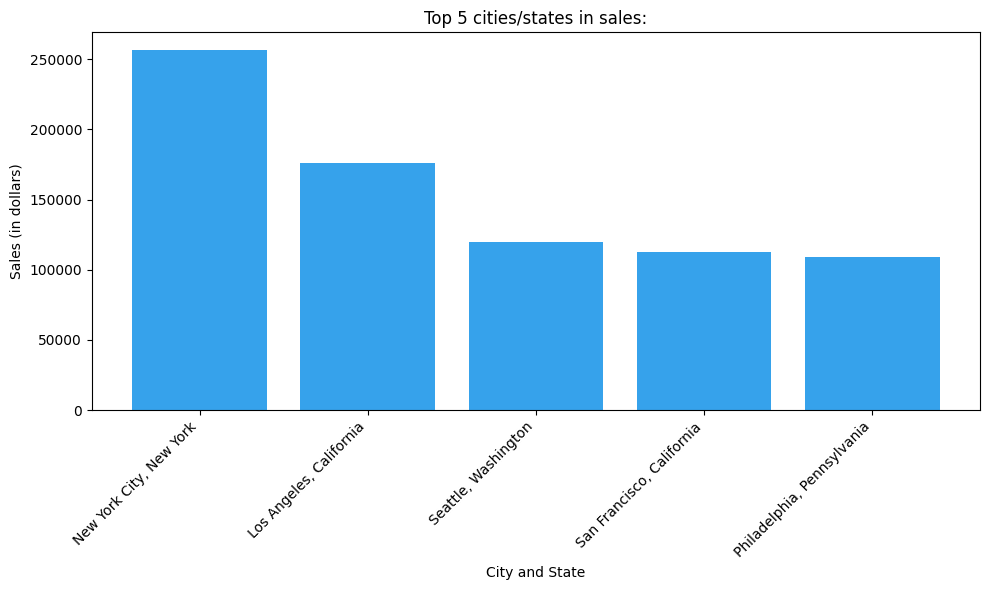

In [22]:
##Which country/state/city/region has the highest sales?
geo_sales = df.groupby(['City', 'State'])['Sales'].sum().reset_index()

top_geo_sales = geo_sales.sort_values(by='Sales', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_geo_sales['City'] + ', ' + top_geo_sales['State'], top_geo_sales['Sales'], color='#36A2EB')
plt.title('Top 5 cities/states in sales:')
plt.xlabel('City and State')
plt.ylabel('Sales (in dollars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

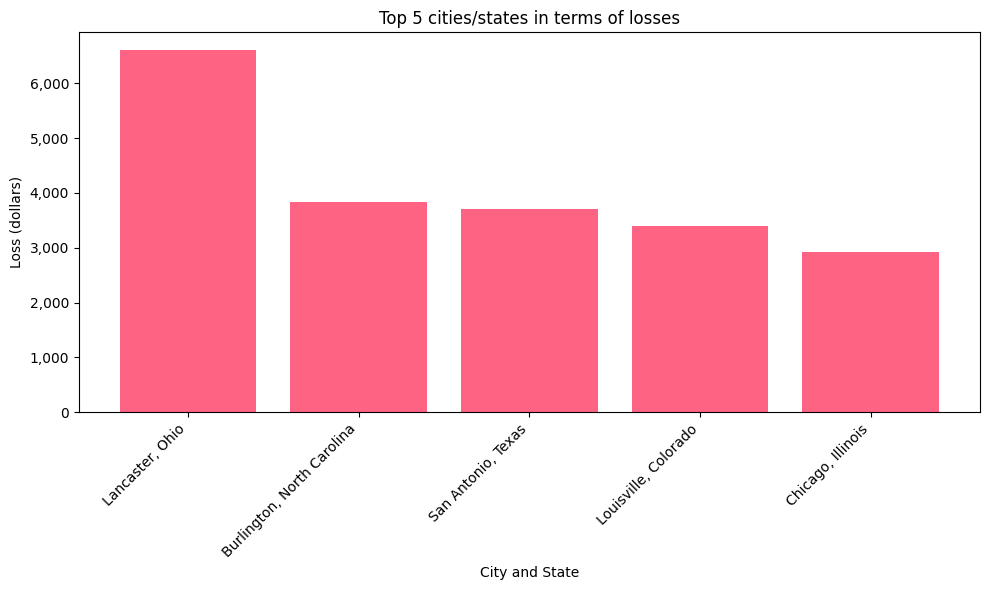

Cities/states that lose more than they gain:
               State         City    Profit
7772            Ohio    Lancaster -6,599.98
683   North Carolina   Burlington -3,839.99
9774           Texas  San Antonio -3,701.89
3011        Colorado   Louisville -3,399.98
4991        Illinois      Chicago -2,929.48


In [23]:

df['Loss_Amount'] = df['Profit'].apply(lambda x: -x if x < 0 else 0)

loss_geo = df[df['Loss_Amount'] > 0]

loss_geo = loss_geo.sort_values(by='Loss_Amount', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(loss_geo['City'] + ', ' + loss_geo['State'], loss_geo['Loss_Amount'], color='#FF6384')
plt.title('Top 5 cities/states in terms of losses')
plt.xlabel('City and State')
plt.ylabel('Loss (dollars)')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

print("Cities/states that lose more than they gain:")
print(loss_geo[['State', 'City', 'Profit']])

# **Analysis by time**

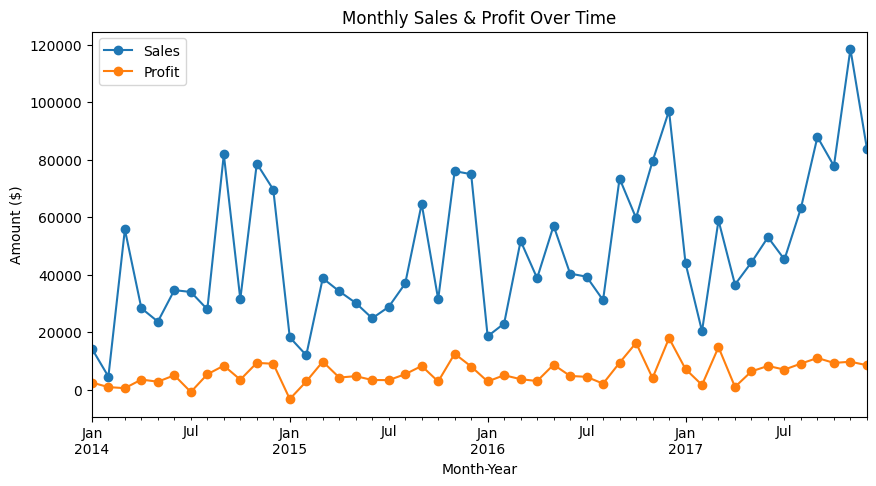

In [24]:
##Monthly Sales & Profit
df['YearMonth'] = df['Order Date'].dt.to_period('M')

monthly_summary = df.groupby('YearMonth')[['Sales', 'Profit']].sum()

monthly_summary.plot(figsize=(10,5), marker='o', title="Monthly Sales & Profit Over Time")
plt.ylabel("Amount ($)")
plt.xlabel("Month-Year")
plt.show()


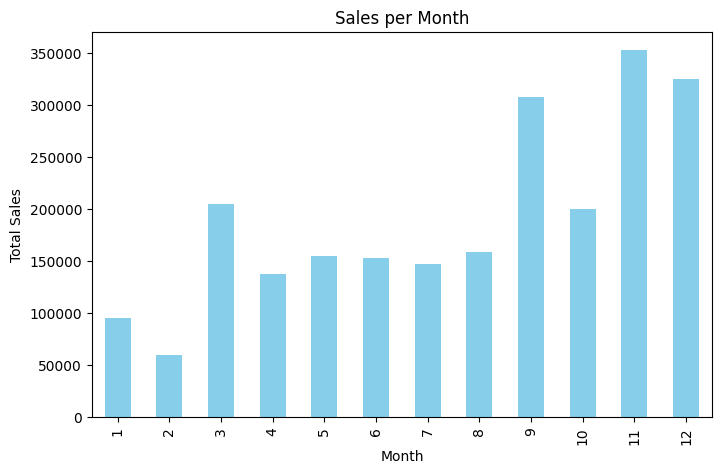

In [25]:
##Do you have busy seasons?
df['Month'] = df['Order Date'].dt.month

monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='bar', figsize=(8,5), color='skyblue', title="Sales per Month")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()


# **Analysis by shipment**

                      Sales     Profit  Discount  Profit Margin (%)
Ship Mode                                                          
First Class      351,428.42  48,969.84    253.17              13.93
Same Day         128,363.12  15,891.76     82.75              12.38
Second Class     459,193.57  57,446.64    270.15              12.51
Standard Class 1,358,215.74 164,088.79    955.02              12.08


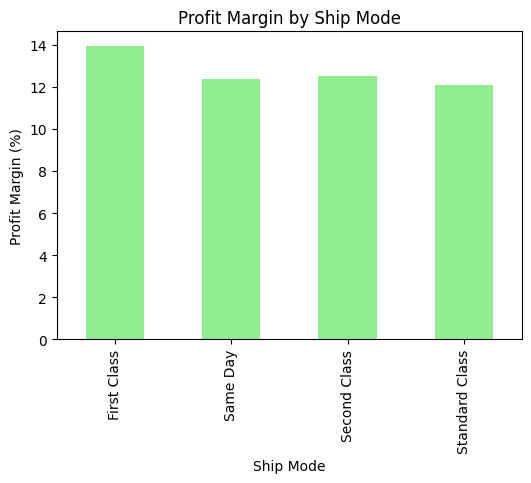

In [26]:
##Which shipping mode gives the highest profit and lowest cost?

ship_summary = df.groupby('Ship Mode')[['Sales', 'Profit', 'Discount']].sum()

ship_summary['Profit Margin (%)'] = (ship_summary['Profit'] / ship_summary['Sales']) * 100

print(ship_summary)

ship_summary['Profit Margin (%)'].plot(kind='bar', figsize=(6,4), color='lightgreen', title="Profit Margin by Ship Mode")
plt.ylabel("Profit Margin (%)")
plt.show()

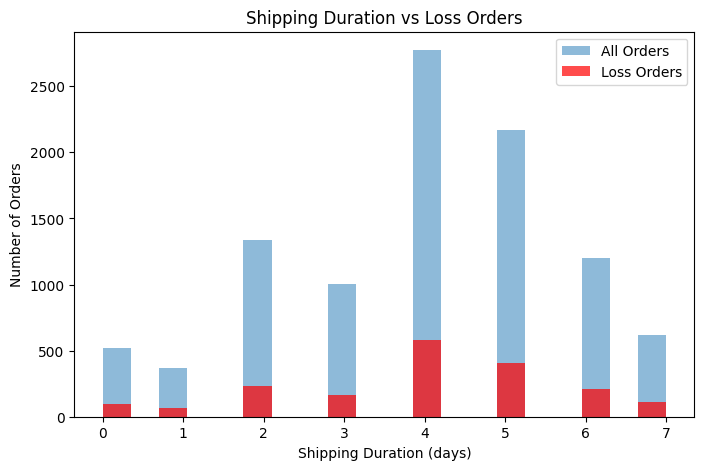

Average shipping duration - All Orders: 3.958174904942966
Average shipping duration - Loss Orders: 3.972207375734901


In [27]:
##Is shipping delay linked to losses
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

loss_orders = df[df['Profit'] < 0]

plt.figure(figsize=(8,5))
plt.hist(df['Shipping Duration'], bins=20, alpha=0.5, label='All Orders')
plt.hist(loss_orders['Shipping Duration'], bins=20, alpha=0.7, label='Loss Orders', color='red')
plt.xlabel("Shipping Duration (days)")
plt.ylabel("Number of Orders")
plt.title("Shipping Duration vs Loss Orders")
plt.legend()
plt.show()

print("Average shipping duration - All Orders:", df['Shipping Duration'].mean())
print("Average shipping duration - Loss Orders:", loss_orders['Shipping Duration'].mean())


In [28]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,...,Category,Product Name,Sales,Quantity,Discount,Profit,Loss_Amount,YearMonth,Month,Shipping Duration
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,...,Furniture,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,0.00,2016-11,11,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,...,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,0.00,2016-11,11,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,...,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,0.00,2016-06,6,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,...,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,383.03,2015-10,10,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,...,Office Supplies,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,0.00,2015-10,10,7


# **Report**
When we looked at the overall performance of the Superstore, we noticed that total sales are very high compared to total profit—almost 8 times higher. This tells us that while the company is selling a lot, the profits are being eaten up by high costs like shipping and discounts.

Speaking of discounts, the average discount applied is 15%. While discounts can attract customers, they might be hurting the profitability of low-margin products. To improve profits, the company could reduce discounts on low-profit products and focus on items that attract new customers.

We also found that 1,871 orders are actually making a loss. This is a significant number, showing that some products or orders are not profitable. The company should analyze these loss-making orders and find ways to increase their profitability.

When examining different customer segments, the Consumer segment generates the highest sales, but small offices (Home Office) achieve lower sales with higher profit efficiency. This indicates that high sales volume does not always mean high profit. The company should balance its focus between high-sales and high-efficiency segments.

Regional performance varies as well. Some regions are much more profitable than others, suggesting that opening more branches or focusing efforts in high-profit regions could maximize returns.

Looking closer at cities, the top 5 cities account for most of the losses. Investigating the reasons behind these losses and implementing corrective actions is essential.

Finally, analyzing sales and profit trends over time, we observed that while sales are increasing, profits remain relatively low or stable. This points to rising costs or heavy discounts affecting profitability. Monitoring costs and discount strategies over time will help improve the profit trend.

In [38]:
df['Loss_Flag'] = df['Loss_Amount'].apply(lambda x: 1 if x > 0 else 0)

In [39]:
df['Profit_Category'] = pd.qcut(df['Profit'], q=3, labels=['Low', 'Medium', 'High'])

In [40]:
numeric_features = ['Sales', 'Quantity', 'Discount', 'Shipping Duration']
categorical_features = ['Ship Mode', 'Segment', 'Category', 'Region', 'City']

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [43]:
# Classification - Loss_Flag
from sklearn.model_selection import train_test_split

X_clf = df[numeric_features + categorical_features]
y_clf = df['Loss_Flag']

In [44]:
# Regression - Profit
X_reg = df[numeric_features + categorical_features]
y_reg = df['Profit']

In [45]:
# Multi-class Classification - Profit_Category
X_mc = df[numeric_features + categorical_features]
y_mc = df['Profit_Category']

In [46]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_mc_train, X_mc_test, y_mc_train, y_mc_test = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, classification_report
from sklearn.pipeline import Pipeline
import numpy as np

# --- Binary Classification ---
clf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])
clf_pipeline.fit(X_clf_train, y_clf_train)
y_clf_pred = clf_pipeline.predict(X_clf_test)
print("Binary Classification Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("F1 Score:", f1_score(y_clf_test, y_clf_pred))

# --- Regression ---
reg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
reg_pipeline.fit(X_reg_train, y_reg_train)
y_reg_pred = reg_pipeline.predict(X_reg_test)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
print("Regression RMSE:", rmse)

# --- Multi-class Classification ---
mc_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])
mc_pipeline.fit(X_mc_train, y_mc_train)
y_mc_pred = mc_pipeline.predict(X_mc_test)
print("Multi-class Classification Report:\n", classification_report(y_mc_test, y_mc_pred))

Binary Classification Accuracy: 0.9439719859929965
F1 Score: 0.8292682926829268
Regression RMSE: 235.86573595393847
Multi-class Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.88      0.82       637
         Low       0.84      0.78      0.80       649
      Medium       0.80      0.75      0.77       713

    accuracy                           0.80      1999
   macro avg       0.80      0.80      0.80      1999
weighted avg       0.80      0.80      0.80      1999



In [50]:
import pickle

with open("clf_model.pkl", "wb") as f:
    pickle.dump(clf_pipeline, f)

with open("reg_model.pkl", "wb") as f:
    pickle.dump(reg_pipeline, f)

with open("mc_model.pkl", "wb") as f:
    pickle.dump(mc_pipeline, f)

In [51]:
from google.colab import files

files.download("clf_model.pkl")
files.download("reg_model.pkl")
files.download("mc_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
import sklearn
print(sklearn.__version__)


1.6.1
